In [1]:
import numpy as np     
import nashpy as nash
import axelrod as axl
import time
import random

In [2]:
import main

In [13]:
game_ending_probs = np.linspace(0.001, 1-0.001, 10)
number_of_opponents = 1

while number_of_opponents <= 9:
    
    print(number_of_opponents)

    average_running_time_for_same_players = []
    for same_number_of_players_repeat in range(1, 6):
        
        print(same_number_of_players_repeat)

        players = main.who_is_playing(same_number_of_players)
        
        execution_time = []
        for same_opponents_repeat in range(5):

            print(same_opponents_repeat)
            print(players)

            initial_time = time.perf_counter()
            main.probabilities_of_defection(5, players, game_ending_probs, NE_alg, 123)
            final_time = time.perf_counter()
            execution_time.append(final_time - initial_time)
            
            print(execution_time)

        return execution_time

        print("Finished inner for loop!)

        mean_execution_time_for_same_players = sum(execution_time) / len(execution_time)
        average_running_time_for_same_players.append(mean_execution_time_for_same_players)

        print(average_running_time_for_same_players)

    return average_running_time_for_same_players
    
    print("Finished outer for loop!)

    mean_execution_time_for_same_num = sum(average_running_time_for_same_players) / len(average_running_time_for_same_players)
    average_running_time.append(mean_execution_time_for_same_num)

    print(average_running_time)

    num_of_opponents += 1

return(average_running_time)

1
2
3
4
5
6
7
8
9


In [5]:
algorithm_to_time_dict = {
    "Support Enumeration": [],
    "Vertex Enumeration": [],
    "Lemke Howson": []
}

In [6]:
for algorithm in algorithm_to_time_dict:
    algorithm_to_time_dict[algorithm].extend([3, 4, 5.99, 0.3])

In [7]:
algorithm_to_time_dict

{'Support Enumeration': [3, 4, 5.99, 0.3],
 'Vertex Enumeration': [3, 4, 5.99, 0.3],
 'Lemke Howson': [3, 4, 5.99, 0.3]}

In [2]:
import json


json_file = open("trial_run.json", "w")

numbers = []

for i in range (10):
    numbers.append(i)
    save_to_json = json.dumps(numbers)

json_file.write(save_to_json)
json_file.close()

In [10]:
with open("trial_run.json", "r") as timingfile:
    timingdict = timingfile.read()
timings = json.loads(timingdict)
timings

{'Support Enumeration': [3, 4, 5.99, 0.3],
 'Vertex Enumeration': [3, 4, 5.99, 0.3],
 'Lemke Howson': [3, 4, 5.99, 0.3]}

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

markers = ['s', '^', '*']
colours = ['blue', 'orange', 'green']

plotting = list(zip(timings, markers, colours))


[('Support Enumeration', 's', 'blue'),
 ('Vertex Enumeration', '^', 'orange'),
 ('Lemke Howson', '*', 'green')]

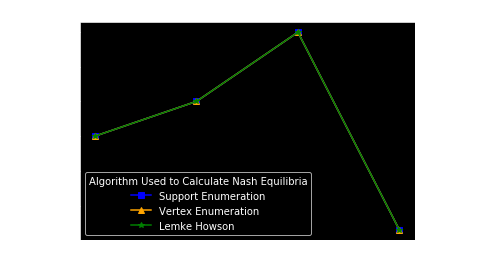

In [66]:
graph1 = plt.figure()
plt.xlabel("Number of opponents" )
plt.ylabel("Execution time (seconds)")
plt.title("A plot to illustrate the time taken for the computer to execute the tournaments")
for alg, marker, colour in zip(timings.keys(), markers, colours):
    plt.plot(timings[alg], marker=marker, color=colour, label=alg)
plt.legend(title='Algorithm Used to Calculate Nash Equilibria')
plt.show()

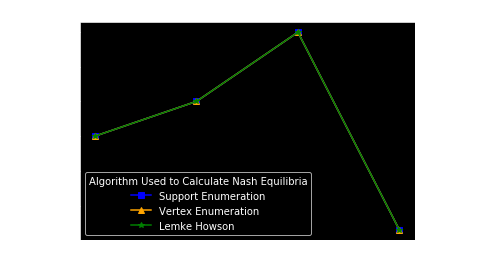

In [70]:
graph1 = plt.figure()
plt.xlabel("Number of opponents" )
plt.ylabel("Execution time (seconds)")
plt.title("A plot to illustrate the time taken for the computer to execute the tournaments")
for (alg, data), marker, colour in zip(timings.items(), markers, colours):
    plt.plot(data, marker=marker, color=colour, label=alg)
plt.legend(title='Algorithm Used to Calculate Nash Equilibria')
plt.show()

In [67]:
timings.keys()

dict_keys(['Support Enumeration', 'Vertex Enumeration', 'Lemke Howson'])

In [68]:
timings.values()

dict_values([[3, 4, 5.99, 0.3], [3, 4, 5.99, 0.3], [3, 4, 5.99, 0.3]])

In [69]:
timings.items()

dict_items([('Support Enumeration', [3, 4, 5.99, 0.3]), ('Vertex Enumeration', [3, 4, 5.99, 0.3]), ('Lemke Howson', [3, 4, 5.99, 0.3])])

In [14]:
def probabilities_of_defection(num_of_repeats, player_list, probs_of_game_ending, nash_equilibrium_algorithm, set_seed):
    """
    A function which executes varying tournaments of A Prisoner's Dilemma, each with a distinct probabilistic ending, and then computes the Nash Equilibria of the resulting mean payoff matrix, where:

    'num_of_repeats' is a numeric variable stating how many times each tournament should be played;

    'player_list' is a list containing all the strategies which are competing;

    'probs_of_game_ending' is a list (or numpy array) of values between 0 and 1 which state the probability of a specific game ending;

    'nash_equilibrium_algorithm' is a string containing either "Support
    Enumeration", "Vertex Enumeration" or "Lemke Howson". This indicates which
    method will be used in calculating the Nash Equilibria. WARNING - the "Lemke
    Howson" algorithm may not return all Nash Equilibria; and
    
    'set_seed' is a numeric variable which ensures reproducibility if the same
    value is used.

    The output is two lists: the first and second containing the least and greatest probability of defection, respectively, obtained in the Nash Equilibria. 
    """

    least_prob_of_defection_in_equilibria = []
    greatest_prob_of_defection_in_equilibria = []

    for probability in probs_of_game_ending:
        
        axl.seed(set_seed)

        tournament = axl.Tournament(player_list, prob_end=probability, repetitions=num_of_repeats)
        
        tournament_results = tournament.play(progress_bar=False)
        mean_payoff_matrix = np.array(tournament_results.payoff_matrix)
        
        game = nash.Game(mean_payoff_matrix, mean_payoff_matrix.transpose())


        if nash_equilibrium_algorithm == "Support Enumeration":
            nash_equilibria = list(game.support_enumeration())
            print(nash_equilibria)

        elif nash_equilibrium_algorithm == "Vertex Enumeration":
            nash_equilibria = list(game.vertex_enumeration())
            print(nash_equilibria)

        elif nash_equilibrium_algorithm == "Lemke Howson":
            nash_equilibria = list(game.lemke_howson_enumeration())
            print(nash_equilibria)

        least_prob_of_defection_in_equilibria.append( min( [sigma_1[-1] for sigma_1, _ in nash_equilibria] ) )
        
        greatest_prob_of_defection_in_equilibria.append( max( [sigma_1[-1] for sigma_1, _ in nash_equilibria] ) )


    return least_prob_of_defection_in_equilibria, greatest_prob_of_defection_in_equilibria

In [15]:
trial = probabilities_of_defection(2, [axl.Cooperator(), axl.TitForTat(), axl.Defector()], [0.05, 0.4, 0.85], "Support Enumeration", 456)

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (2) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)
[(array([0., 1., 0.]), array([0., 1., 0.])), (array([0., 0., 1.]), array([0., 0., 1.]))]
[(array([0., 0., 1.]), array([0., 0., 1.]))]
[(array([0., 0., 1.]), array([0., 0., 1.]))]


In [13]:
print(trial)

([0.0, 1.0, 1.0], [1.0, 1.0, 1.0])


In [2]:
repeats = 2
epsilon = 0.01

probs = np.linspace(epsilon, 1 - epsilon, 5) #obtaining 500 points for the prob. of a game p, 0 < p < 1
least_prob_of_defect_equilibria = [] #creating an empty list

for p in probs:
    axl.seed(0) #setting the seed so we obtain the same results
    players = [axl.Cooperator(), axl.TitForTat(), axl.Random(), axl.Defector()] #strategies used in the tournament
    tournament = axl.Tournament(players, prob_end=p, repetitions=repeats)  #we wish the tournament to be repeated 'repeat' times with a probablistic ending given by p
    results = tournament.play(progress_bar=False) #play the tournament
    payoff_matrix = np.array(results.payoff_matrix) #we wish to obtain the mean payoffs for each player in a matrix
    game = nash.Game(payoff_matrix, payoff_matrix.transpose()) #creating a game from the matrix obtained
    least_prob_of_defect_equilibria.append(
        min([sigma_1[-1] for sigma_1, _ in game.support_enumeration()])
    )  #we wish to obtain a list of the smallest probability of defection in any equilibria in order to plot.

C:\Users\sophi\Anaconda3\lib\site-packages\nashpy\algorithms\support_enumeration.py:196: RuntimeWarning: 
An even number of (4) equilibria was returned. This
indicates that the game is degenerate. Consider using another algorithm
to investigate.
                  
  warnings.warn(warning, RuntimeWarning)


In [19]:
import json

save_to_json = json.dumps(algorithm_to_time_dict)
algorithm_dict_to_file = open("trial_run.json", "w")
algorithm_dict_to_file.write(save_to_json)
algorithm_dict_to_file.close()

# Database code

In [51]:
equilibria = [[1, 0, 0, 1], [0.3, 0.7, 0.7, 0.3]]
equilibria_as_string = str(str(equilibria).strip('[]').split('], [')).strip('[]')

In [52]:
equilibria_as_string

"'1, 0, 0, 1', '0.3, 0.7, 0.7, 0.3'"

In [54]:
equilibria = [[[1, 0], [0, 1]], [[0.3, 0.7], [0.7, 0.3]]]

In [55]:
equilibria

[[[1, 0], [0, 1]], [[0.3, 0.7], [0.7, 0.3]]]

In [57]:
len(equilibria)

2

In [61]:
np.array(equilibria).flatten()

array([1. , 0. , 0. , 1. , 0.3, 0.7, 0.7, 0.3])

In [59]:
import main

In [ ]:
main.